# Завдання

1. Завантажте зображення та застосуйте до нього фільтр Собеля для виділення вертикальних та горизонтальних границь. Відобразіть результат.
2. Реалізуйте фільтр Canny для виділення границь на зображенні. Візьміть зображення з попереднього завдання. Відобразіть результат
3. Застосуйте фільтр Робертса для виділення границь на зображенні. Візьміть зображення з попереднього завдання. Відобразіть результат.
4. Порівняйте результати фільтрів Собеля, Кенні та Робертса для виділення границь на зображенні. Обгрунтуйте висновки.

## Рішення

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [44]:
img = cv2.imread('monty_python.jpg')

### 1. Завантажте зображення та застосуйте до нього фільтр Собеля для виділення вертикальних та горизонтальних границь. Відобразіть результат.

In [45]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

sobel_x = cv2.filter2D(gray, -1, kernel_x)
sobel_y = cv2.filter2D(gray, -1, kernel_y)
sobel = sobel_x + sobel_y

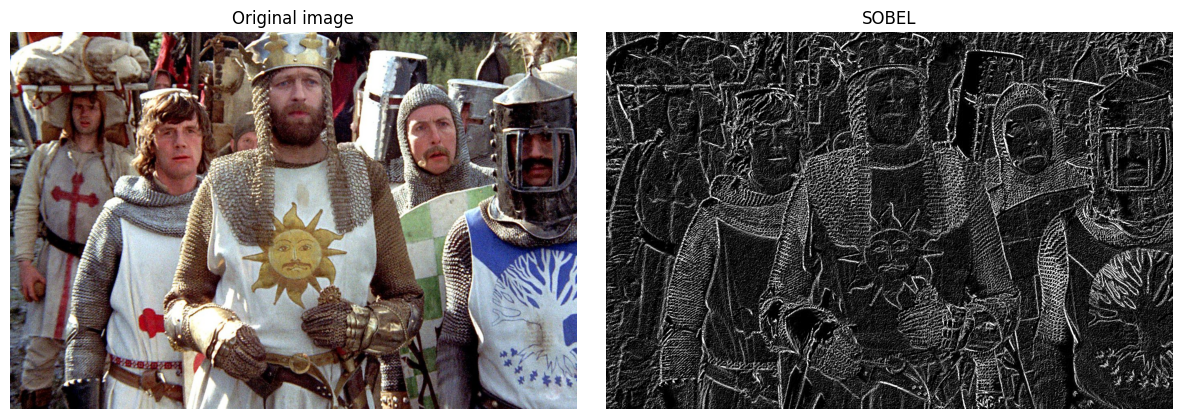

In [46]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
sobel1 = cv2.cvtColor(sobel, cv2.COLOR_BGR2RGB)
list_images = [img1, sobel1]

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.3
                 )

titles = ['Original image', 'SOBEL']

for ax, im, titles in zip(grid, list_images, titles):
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

### 2. Реалізуйте фільтр Canny для виділення границь на зображенні. Візьміть зображення з попереднього завдання. Відобразіть результат

In [47]:
canny = cv2.Canny(gray, 50, 150)

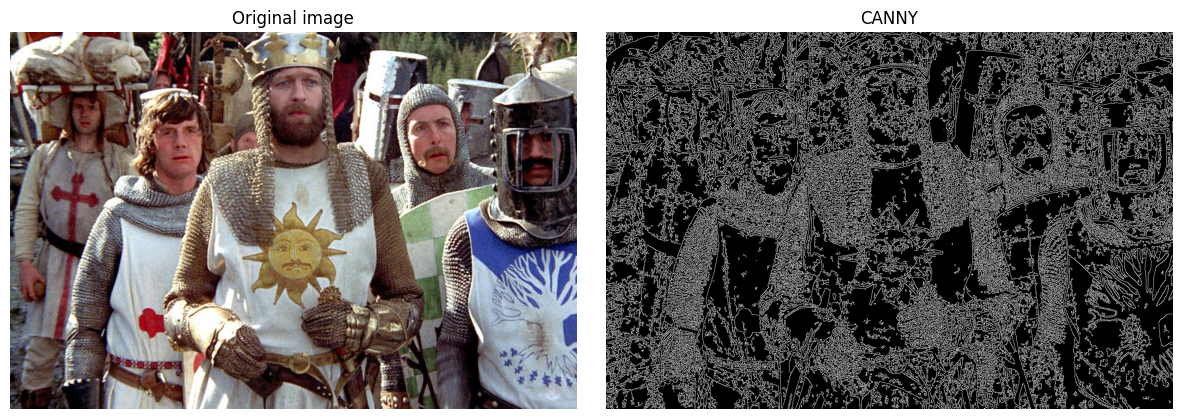

In [48]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny1 = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
list_images = [img1, canny1]

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.3
                 )

titles = ['Original image', 'CANNY']

for ax, im, titles in zip(grid, list_images, titles):
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

### 3. Застосуйте фільтр Робертса для виділення границь на зображенні. Візьміть зображення з попереднього завдання. Відобразіть результат.

In [49]:
kernelx = np.array([[-1, 0], [0, 1]], dtype=np.float32)
kernely = np.array([[0, -1], [1, 0]], dtype=np.float32)

gx = cv2.filter2D(gray, -1, kernelx)
gy = cv2.filter2D(gray, -1, kernely)
g = gx + gy

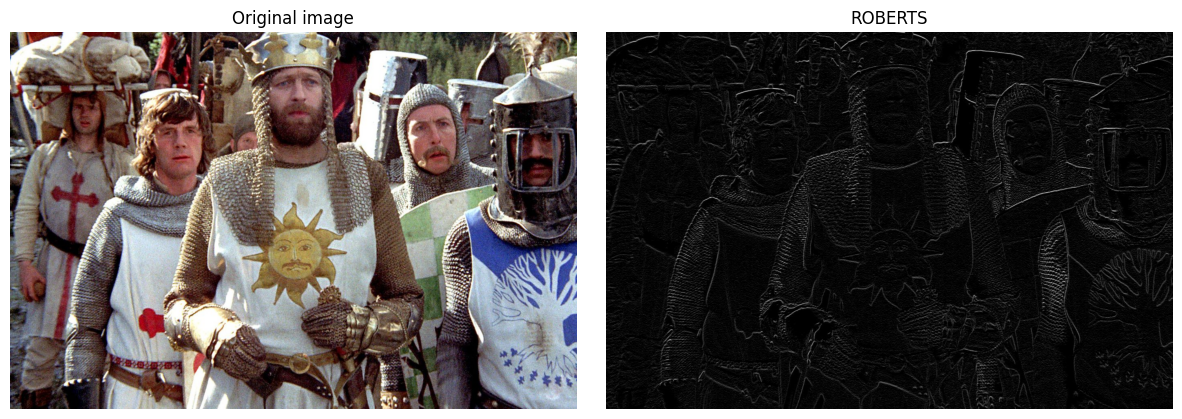

In [50]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
g1 = cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
list_images = [img1, g1]

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.3
                 )

titles = ['Original image', 'ROBERTS']

for ax, im, titles in zip(grid, list_images, titles):
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

### 4. Порівняйте результати фільтрів Собеля, Кенні та Робертса для виділення границь на зображенні. Обгрунтуйте висновки.

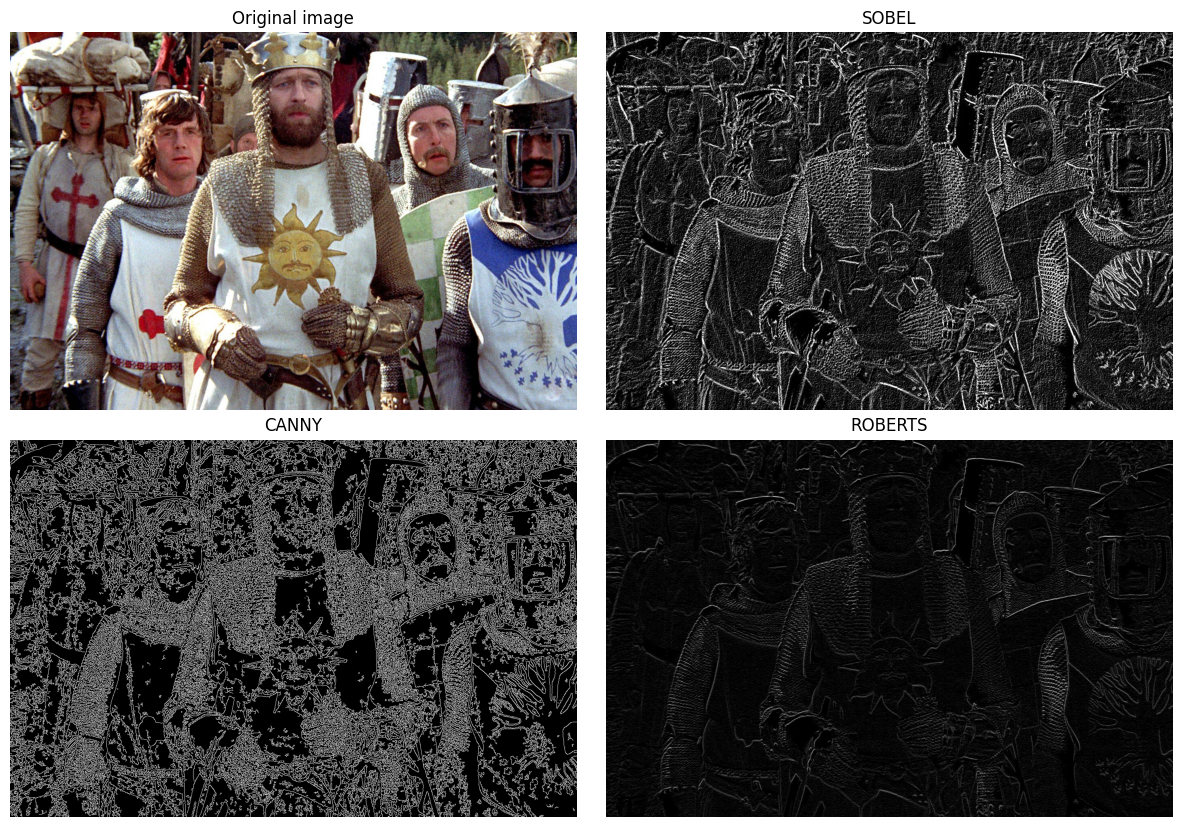

In [51]:
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
sobel1 = cv2.cvtColor(sobel, cv2.COLOR_BGR2RGB)
canny1 = cv2.cvtColor(canny, cv2.COLOR_BGR2RGB)
g1 = cv2.cvtColor(g, cv2.COLOR_BGR2RGB)
list_images = [img1, sobel1, canny1, g1]

fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(2, 2),
                 axes_pad=0.3
                 )

titles = ['Original image', 'SOBEL', 'CANNY', 'ROBERTS']

for ax, im, titles in zip(grid, list_images, titles):
    ax.axis('off')
    ax.imshow(im)
    ax.set_title(titles)

plt.show()

#### Висновки

Кожен з цих фільтрів має свої переваги та недоліки в різних сценаріях.
Фільтр ROBERTS має низьку обчислювальну складність, що робить його швидшим за інші методи. Однак, він чутливий до шуму та може виявляти багато неважливих деталей.
Фільтр SOBEL дозволяє отримувати більш точні результати, ніж фільтр Робертса, і менше чутливий до шуму. Однак, він більш обчислювально вимогливий та може виявляти зайві деталі.
Фільтр CANNY дозволяє виявляти границі різних форм та розмірів, що робить його ідеальним для застосування у вимогливих завданнях обробки зображень. Однак, він має високу обчислювальну складність, що робить його повільним.

На мою думку, для нашого прикладу, кращі результати показали фільтри CANNY та SOBEL.